In [29]:
import networkx as nx
from networkx.drawing.nx_agraph import read_dot, write_dot, graphviz_layout
import matplotlib.pyplot as plt

In [3]:
PATH = "../profiles/graph.dot"

In [104]:
graph = read_dot(PATH)

In [15]:
# Convert weights from string to float -> will cause errors otherwise
for u,v,d in graph.edges(data=True):
    if "weight" in d:
        d['weight'] = float(d['weight'])

In [109]:
benchmarkRootNodes=[]

for node in list(graph.nodes.data())[1::]:
    if  "Benchmark" in node[1]["label"]:
        #print(node[1]["label"])
        benchmarkRootNodes.append((node[1]["label"], node[0]))
        

benchmarkRootNodes

[('model\\nBenchmarkJSONMarshallingSamplePairMatrix\\n0 of 0.56s (1.77%)',
  'N46'),
 ('model\\nBenchmarkJSONMarshallingSampleHistogramPairMatrix\\n0 of 0.75s (2.37%)',
  'N57'),
 ('model\\nBenchmarkLabelToSignatureDouble\\n0 of 0.82s (2.59%)', 'N58'),
 ('model\\nBenchmarkLabelToSignatureScalar\\n0 of 1.09s (3.44%)', 'N59'),
 ('model\\nBenchmarkLabelToSignatureSingle\\n0 of 0.76s (2.40%)', 'N60'),
 ('model\\nBenchmarkLabelToSignatureTriple\\n0 of 0.67s (2.12%)', 'N61'),
 ('model\\nBenchmarkMetric\\n0 of 0.45s (1.42%)', 'N62'),
 ('model\\nBenchmarkMetricToFastFingerprintDouble\\n0 of 0.96s (3.03%)',
  'N63'),
 ('model\\nBenchmarkMetricToFastFingerprintScalar\\n0 of 1.11s (3.50%)',
  'N64'),
 ('model\\nBenchmarkMetricToFastFingerprintSingle\\n0 of 0.99s (3.13%)',
  'N65'),
 ('model\\nBenchmarkMetricToFastFingerprintTriple\\n0 of 0.94s (2.97%)',
  'N66'),
 ('model\\nBenchmarkMetricToFingerprintDouble\\n0 of 0.59s (1.86%)', 'N67'),
 ('model\\nBenchmarkMetricToFingerprintScalar\\n0 of 1.07s

In [62]:
allModelNodes = set([])

In [ ]:
allModelNodes =[]
for node in list(graph.nodes.data())[1::]:
    if  "model" in node[1]["label"].split('\\'):
        #print(node[1]["label"])
        benchmarkRootNodes.append((node[1]["label"], node[0]))

benchmarkRootNodes

In [26]:
sub = nx.descendants(graph, benchmarkRootNodes[5])
sub = graph.subgraph(sub)

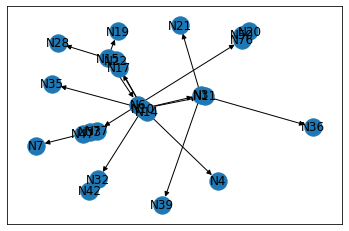

In [63]:
nx.draw_networkx(sub)

In [69]:
set(sub.nodes())

{'N10',
 'N11',
 'N14',
 'N15',
 'N17',
 'N19',
 'N20',
 'N21',
 'N22',
 'N28',
 'N3',
 'N32',
 'N33',
 'N35',
 'N36',
 'N39',
 'N4',
 'N42',
 'N47',
 'N50',
 'N6',
 'N7',
 'N76',
 'N77'}

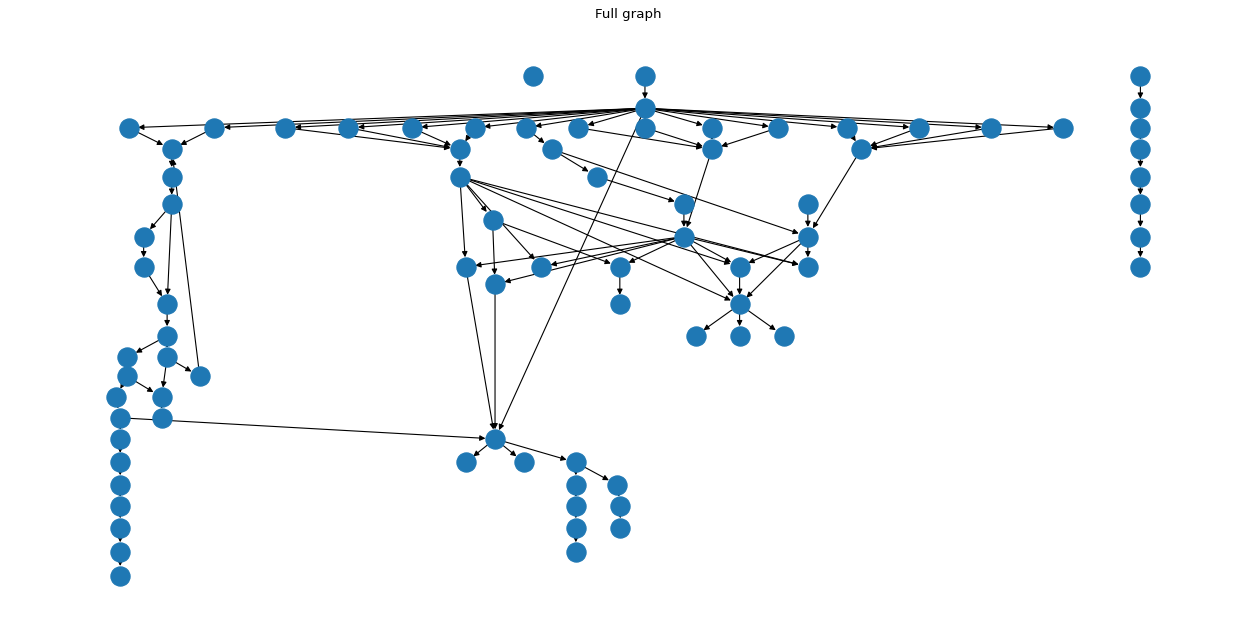

In [53]:
plt.figure(figsize=(20, 10), dpi=80)
# same layout using matplotlib with no labels
plt.title('Full graph')
pos =graphviz_layout(graph, prog='dot')
nx.draw(graph, pos, with_labels=False, arrows=True)
plt.savefig('nx_test.png')

In [110]:
allnodes = set()

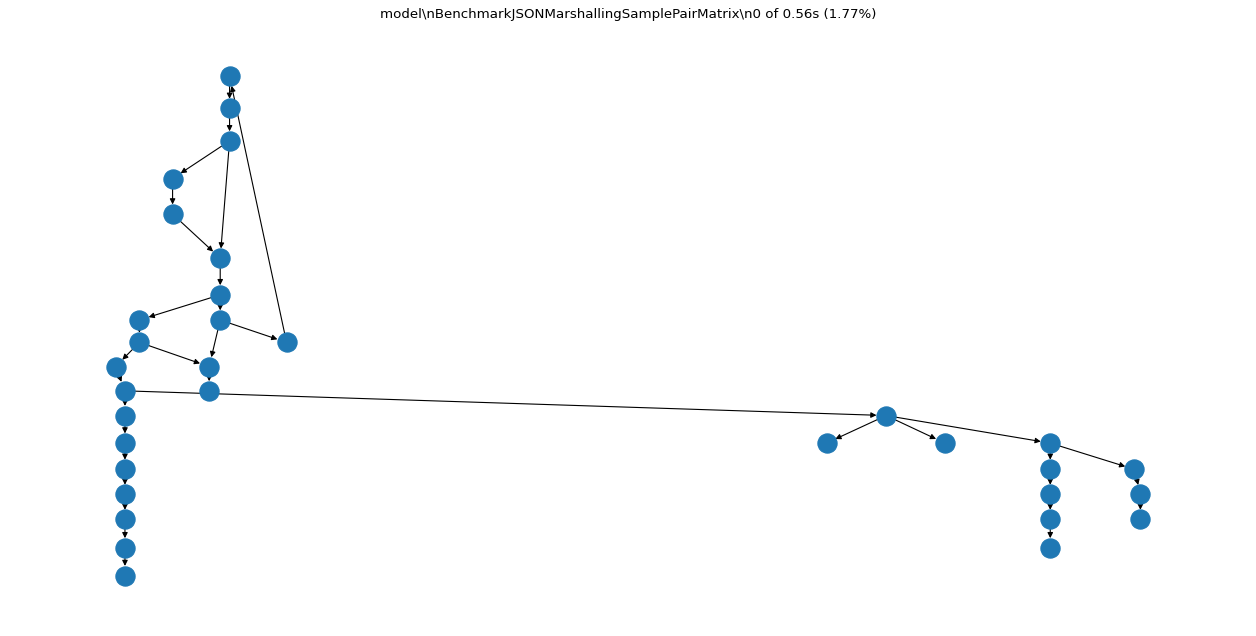

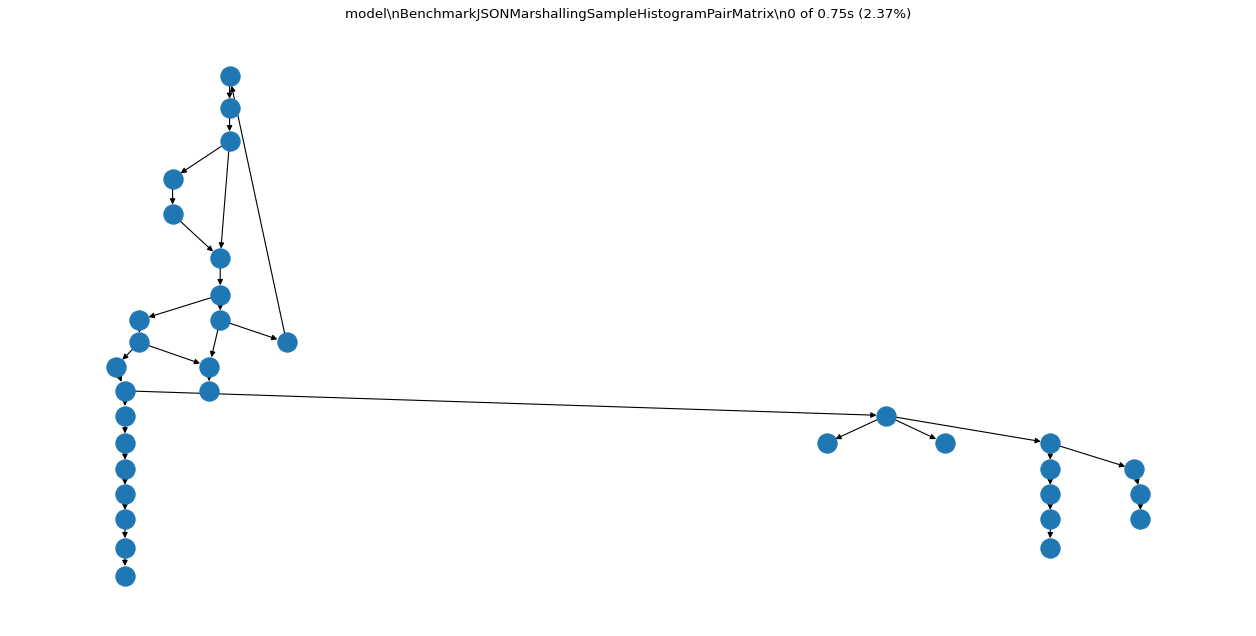

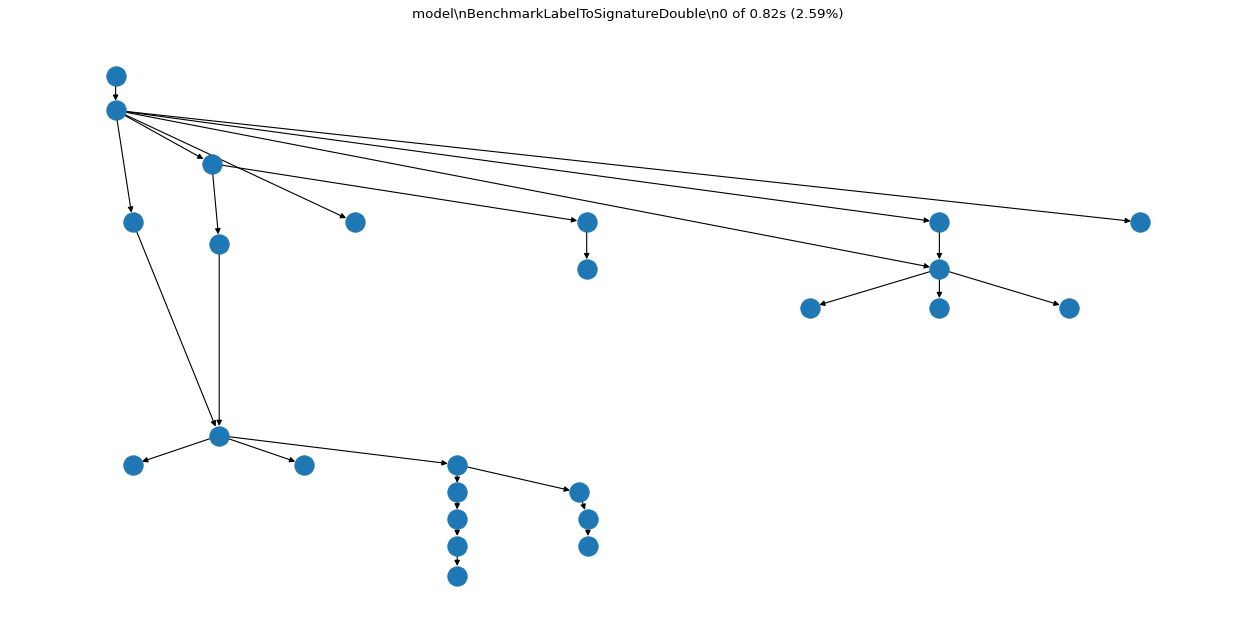

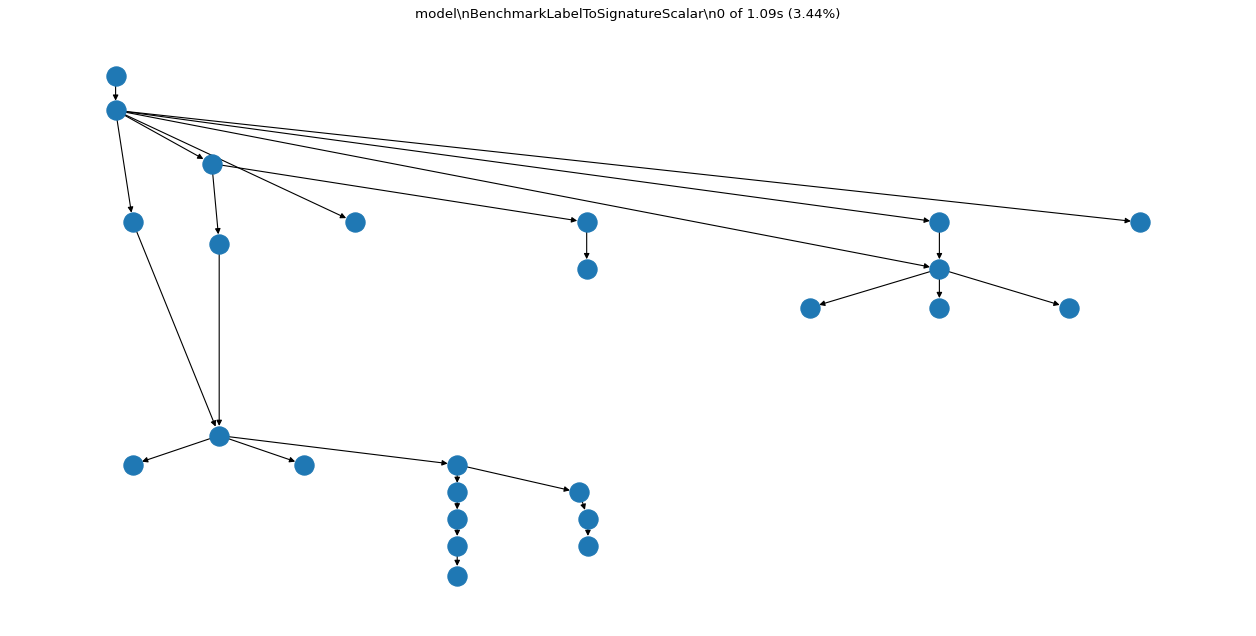

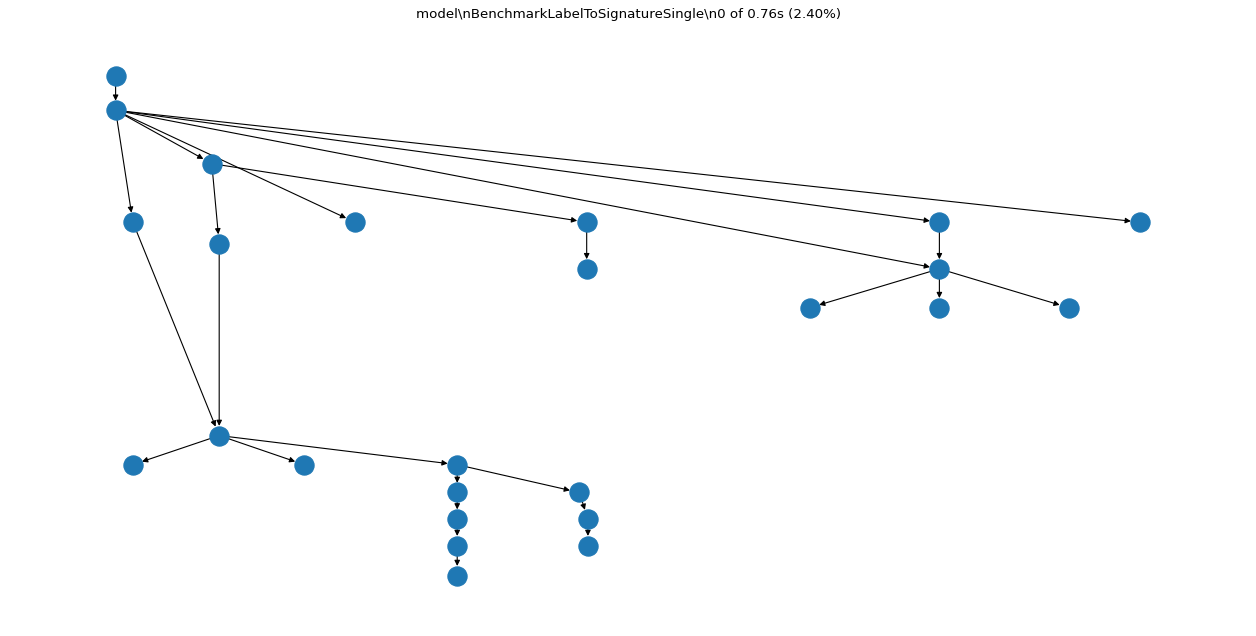

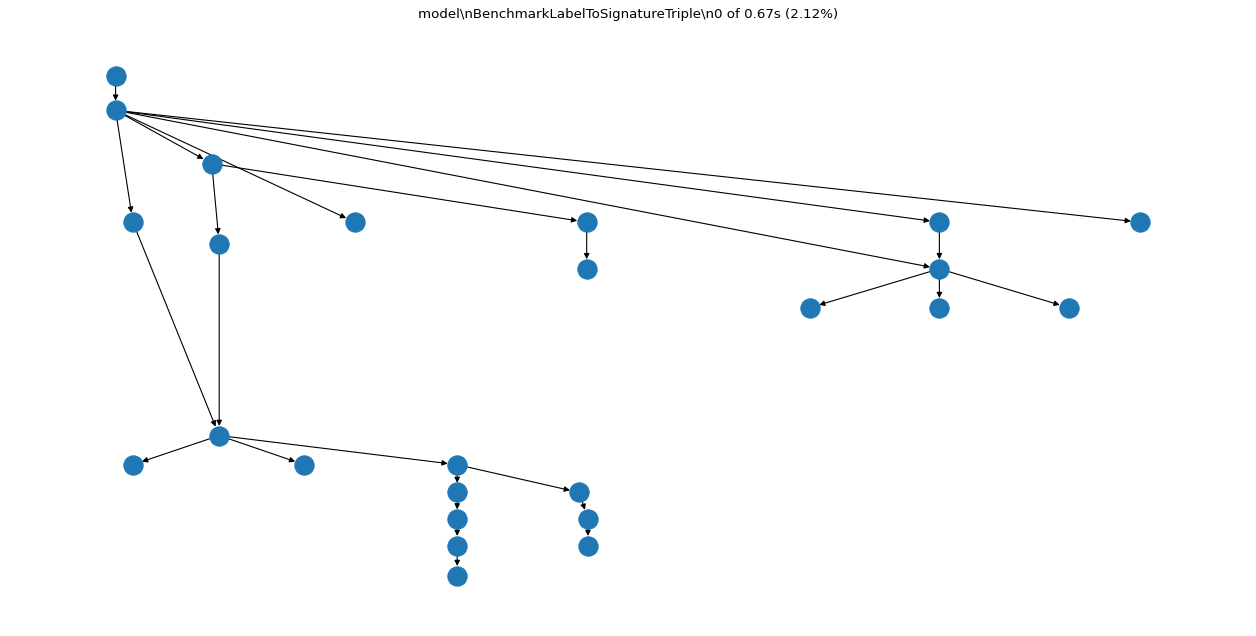

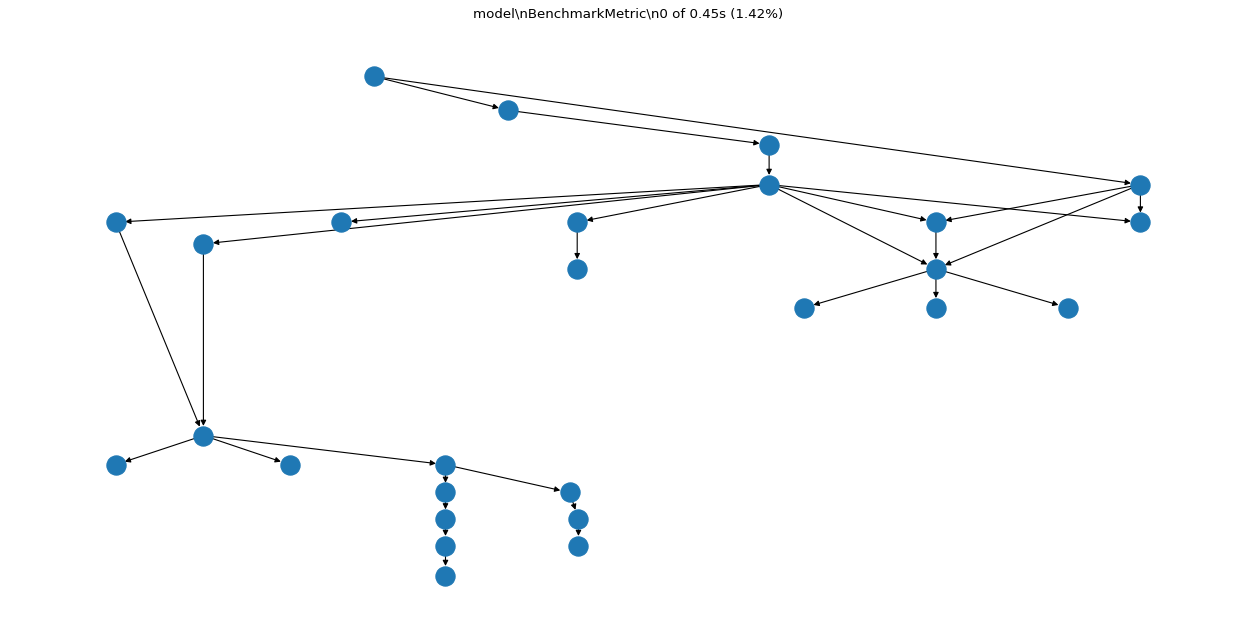

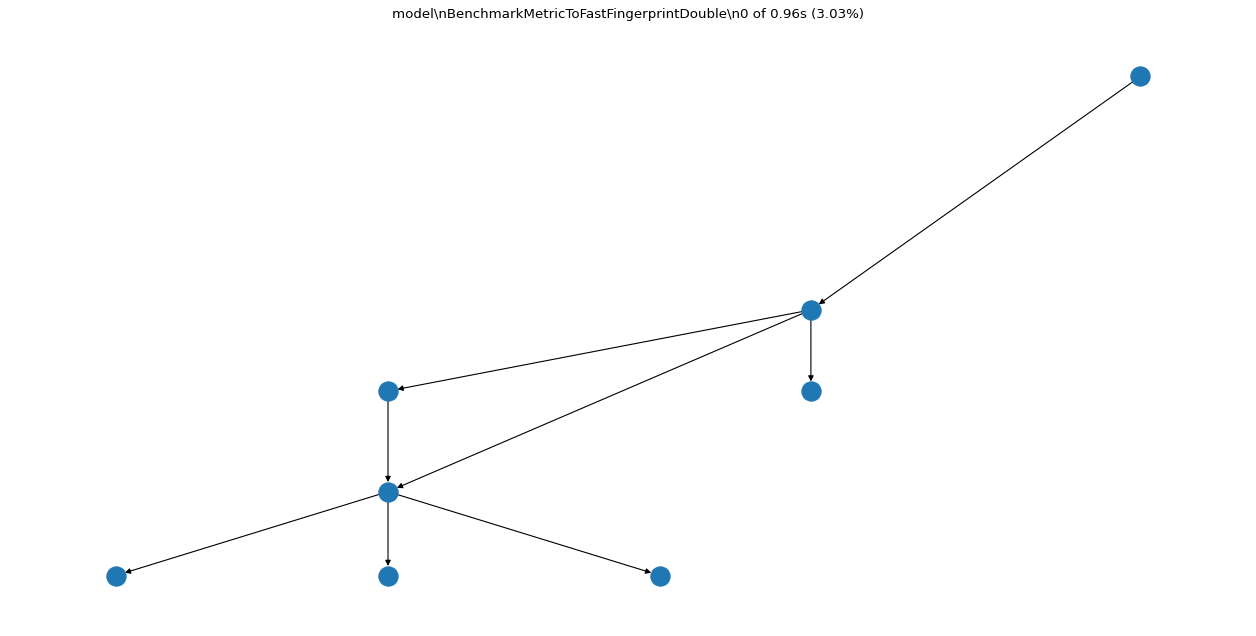

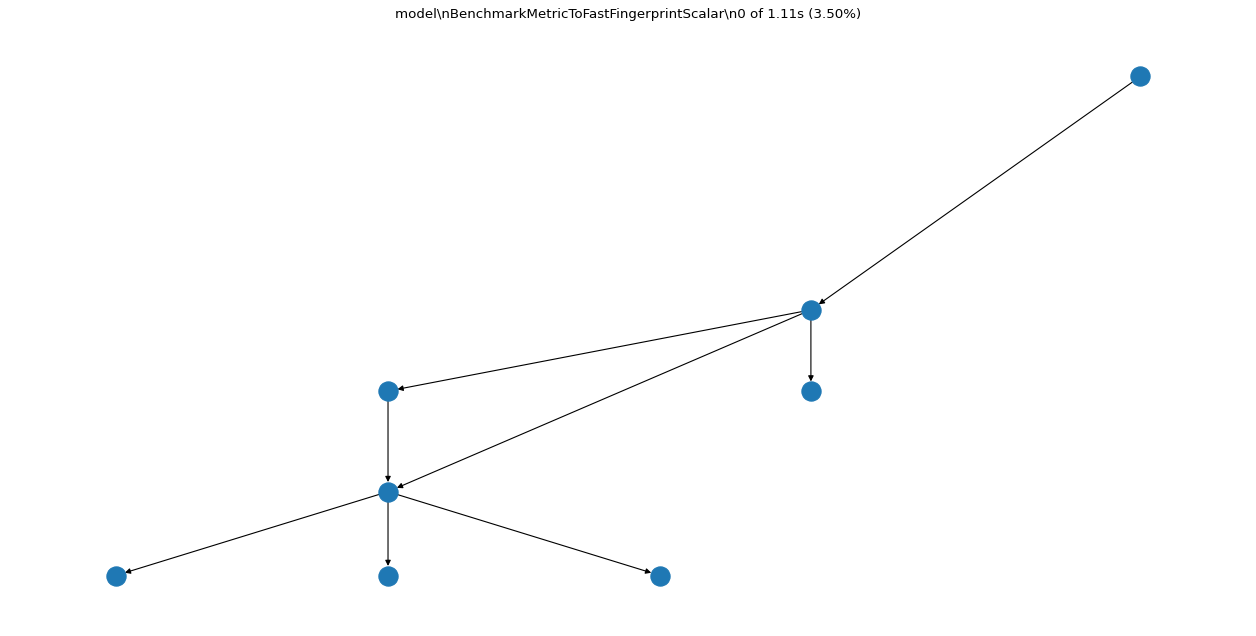

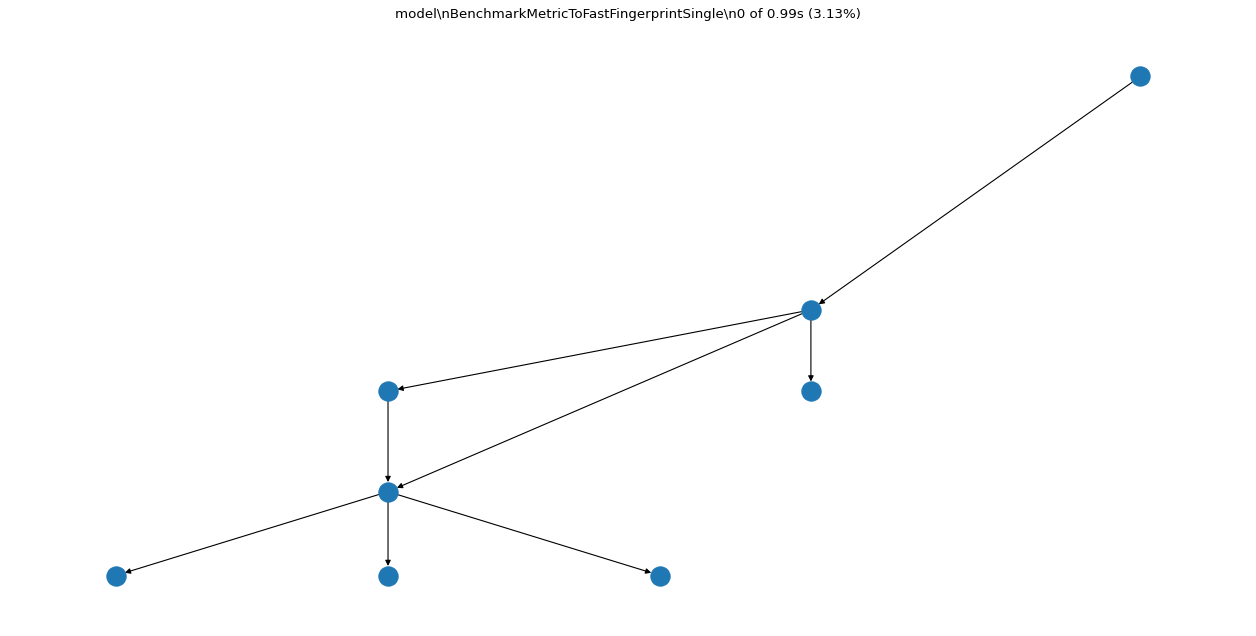

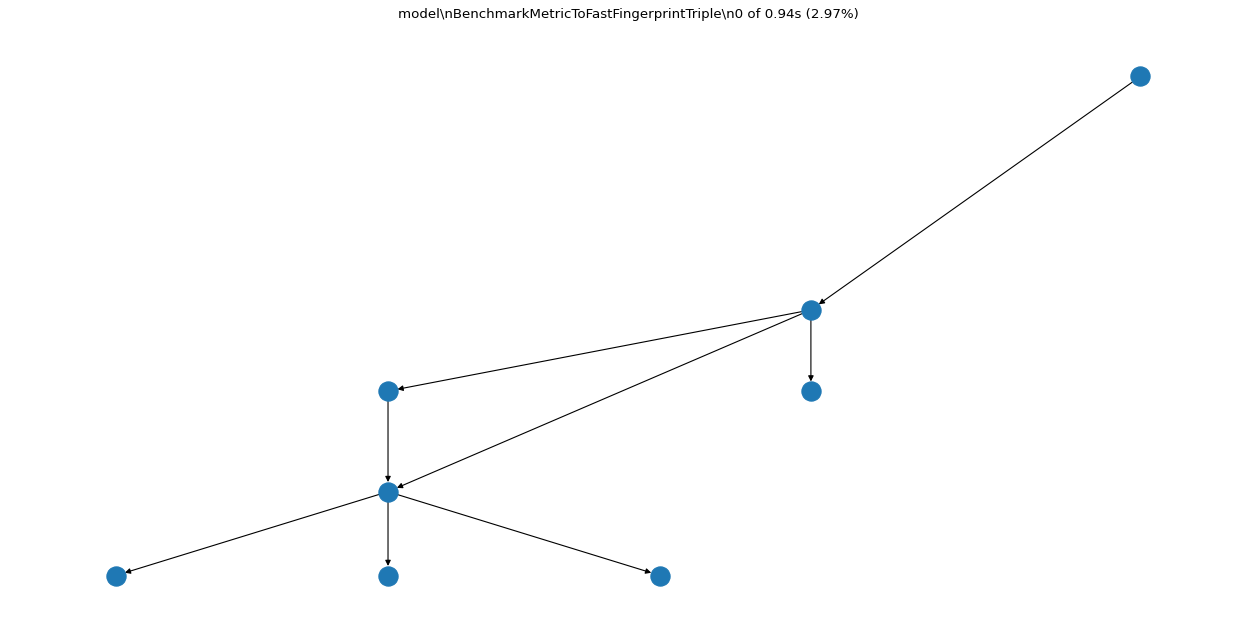

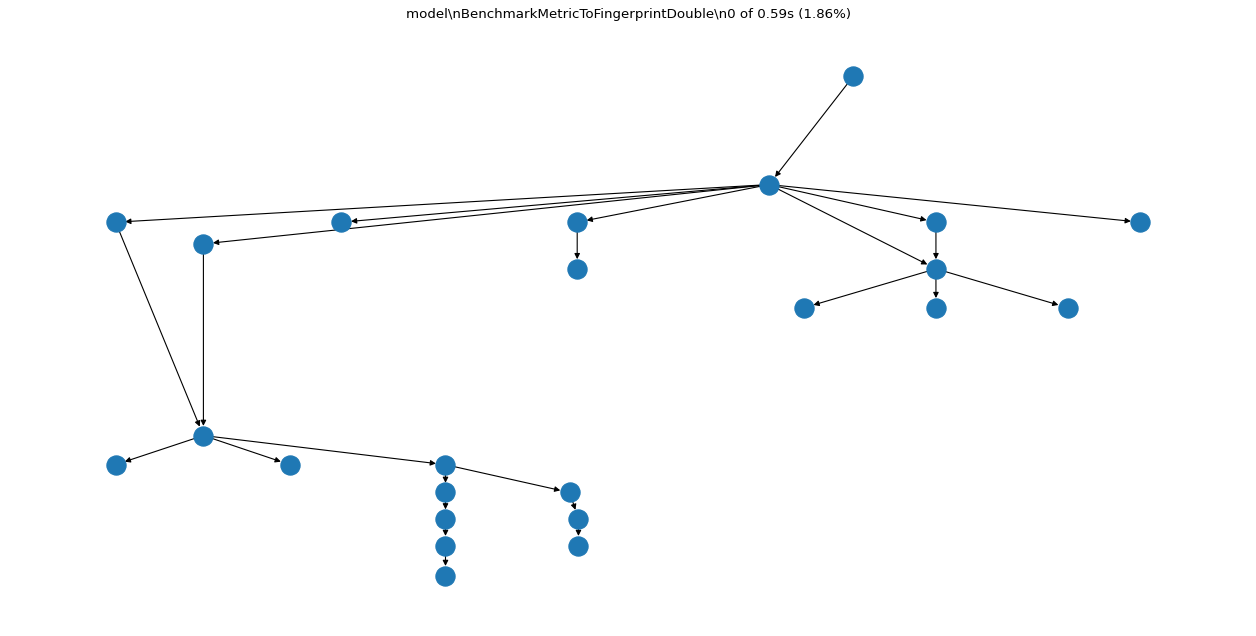

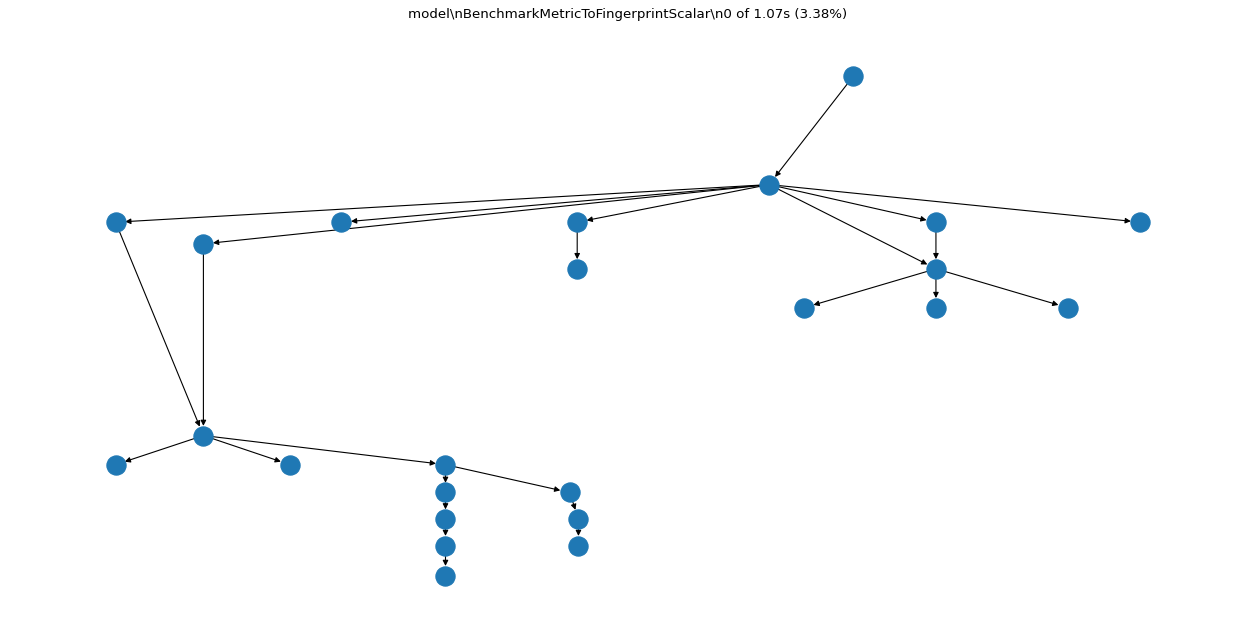

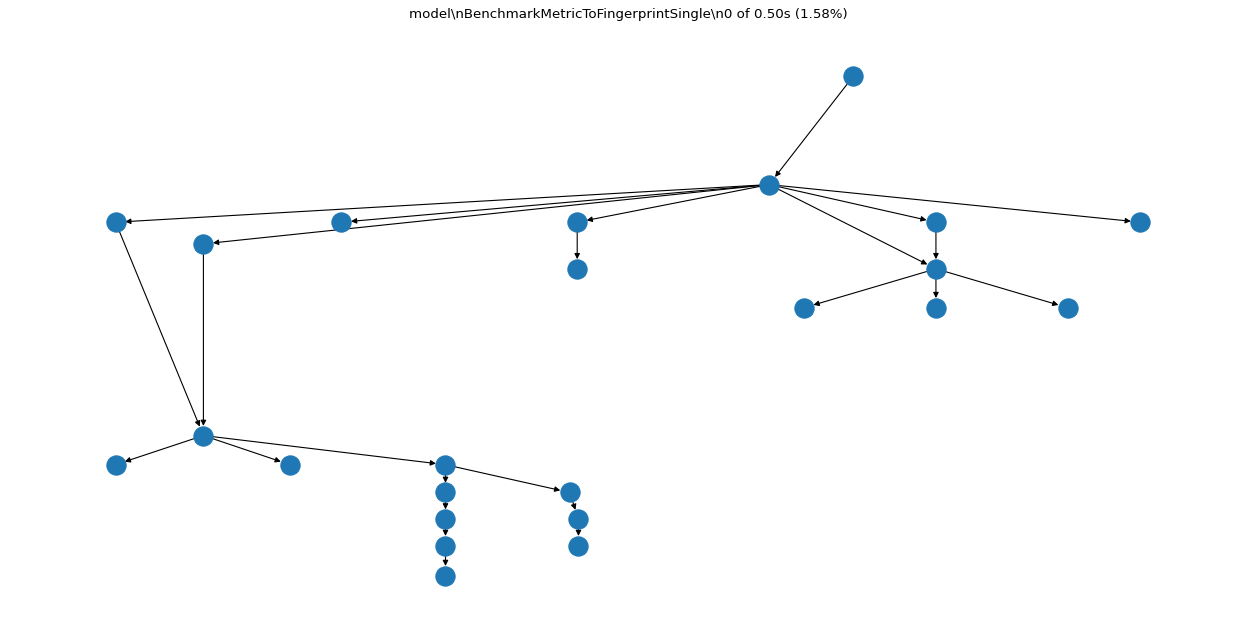

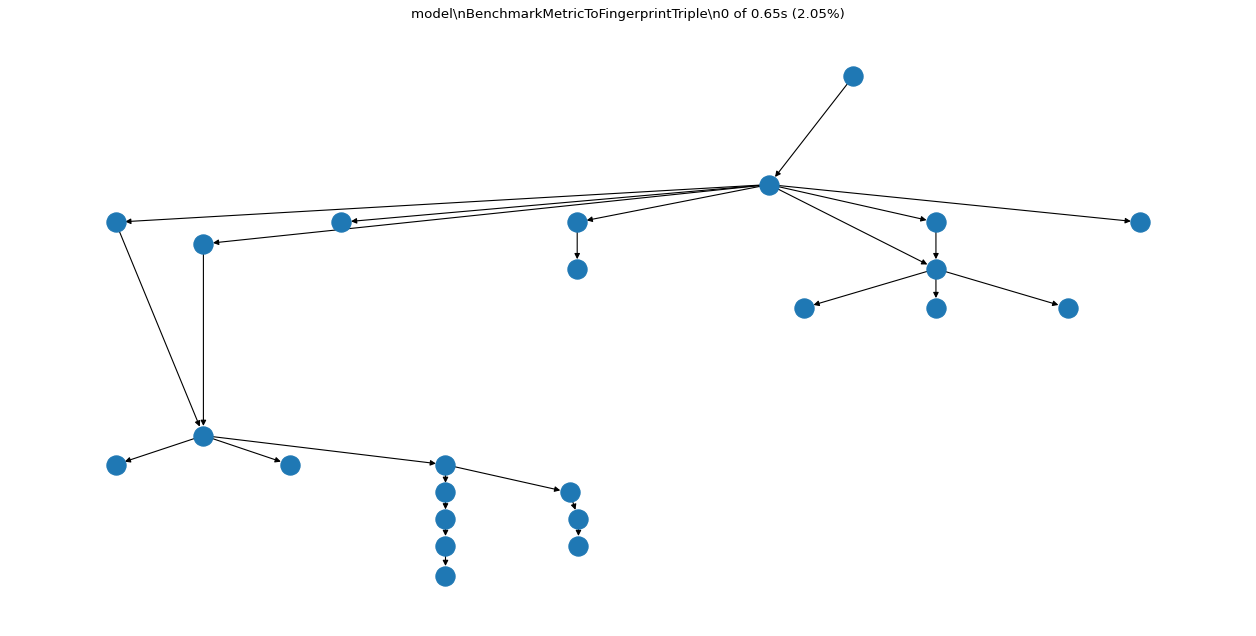

In [111]:
for label, benchmark in benchmarkRootNodes:
    sub = nx.descendants(graph, benchmark)
    sub = graph.subgraph(sub)
    allnodes = allnodes.union(set(sub.nodes()))
    
    # same layout using matplotlib with no labels
    plt.figure(figsize=(20, 10), dpi=80)
    plt.title(label)
    # pos =graphviz_layout(sub, prog='dot')
    nx.draw(sub, pos, with_labels=False, arrows=True)
    # plt.savefig('nx_test.png')
    # plt.show()

In [119]:
coverage = {}

In [120]:
for label, benchmark in benchmarkRootNodes:
    sub = nx.descendants(graph, benchmark)
    sub = graph.subgraph(sub)
    
    name = label.split("\\")[1]
    
    coverage[name] = (len(sub)/len(allnodes)) * 100

In [121]:
coverage

{'nBenchmarkJSONMarshallingSamplePairMatrix': 61.111111111111114,
 'nBenchmarkJSONMarshallingSampleHistogramPairMatrix': 61.111111111111114,
 'nBenchmarkLabelToSignatureDouble': 46.2962962962963,
 'nBenchmarkLabelToSignatureScalar': 46.2962962962963,
 'nBenchmarkLabelToSignatureSingle': 46.2962962962963,
 'nBenchmarkLabelToSignatureTriple': 46.2962962962963,
 'nBenchmarkMetric': 50.0,
 'nBenchmarkMetricToFastFingerprintDouble': 14.814814814814813,
 'nBenchmarkMetricToFastFingerprintScalar': 14.814814814814813,
 'nBenchmarkMetricToFastFingerprintSingle': 14.814814814814813,
 'nBenchmarkMetricToFastFingerprintTriple': 14.814814814814813,
 'nBenchmarkMetricToFingerprintDouble': 44.44444444444444,
 'nBenchmarkMetricToFingerprintScalar': 44.44444444444444,
 'nBenchmarkMetricToFingerprintSingle': 44.44444444444444,
 'nBenchmarkMetricToFingerprintTriple': 44.44444444444444}

In [52]:
list(nx.bfs_edges(graph, "N57"))

[('N57', 'N16'),
 ('N16', 'N53'),
 ('N53', 'N25'),
 ('N25', 'N23'),
 ('N25', 'N55'),
 ('N23', 'N24'),
 ('N55', 'N30'),
 ('N24', 'N26'),
 ('N24', 'N54'),
 ('N26', 'N18'),
 ('N26', 'N74'),
 ('N54', 'N27'),
 ('N18', 'N41'),
 ('N27', 'N48'),
 ('N48', 'N38'),
 ('N38', 'N15'),
 ('N38', 'N56'),
 ('N15', 'N6'),
 ('N15', 'N19'),
 ('N15', 'N28'),
 ('N56', 'N49'),
 ('N6', 'N76'),
 ('N6', 'N77'),
 ('N49', 'N75'),
 ('N76', 'N50'),
 ('N77', 'N33'),
 ('N75', 'N52'),
 ('N50', 'N20'),
 ('N33', 'N47'),
 ('N52', 'N72'),
 ('N47', 'N7'),
 ('N72', 'N45'),
 ('N45', 'N43')]

In [47]:
graph.nodes

NodeView(('Type: cpu', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N34', 'N35', 'N36', 'N37', 'N38', 'N39', 'N40', 'N41', 'N42', 'N43', 'N44', 'N45', 'N46', 'N47', 'N48', 'N49', 'N50', 'N51', 'N52', 'N53', 'N54', 'N55', 'N56', 'N57', 'N58', 'N59', 'N60', 'N61', 'N62', 'N63', 'N64', 'N65', 'N66', 'N67', 'N68', 'N69', 'N70', 'N71', 'N72', 'N73', 'N74', 'N75', 'N76', 'N77', 'N78', 'N79', 'N80'))

# Coverage

All model type nodes:
    - node coverage
    - edge coverage

# Graphviz

In [49]:
import graphviz

In [50]:
full_graph = graphviz.Source.from_file(PATH)

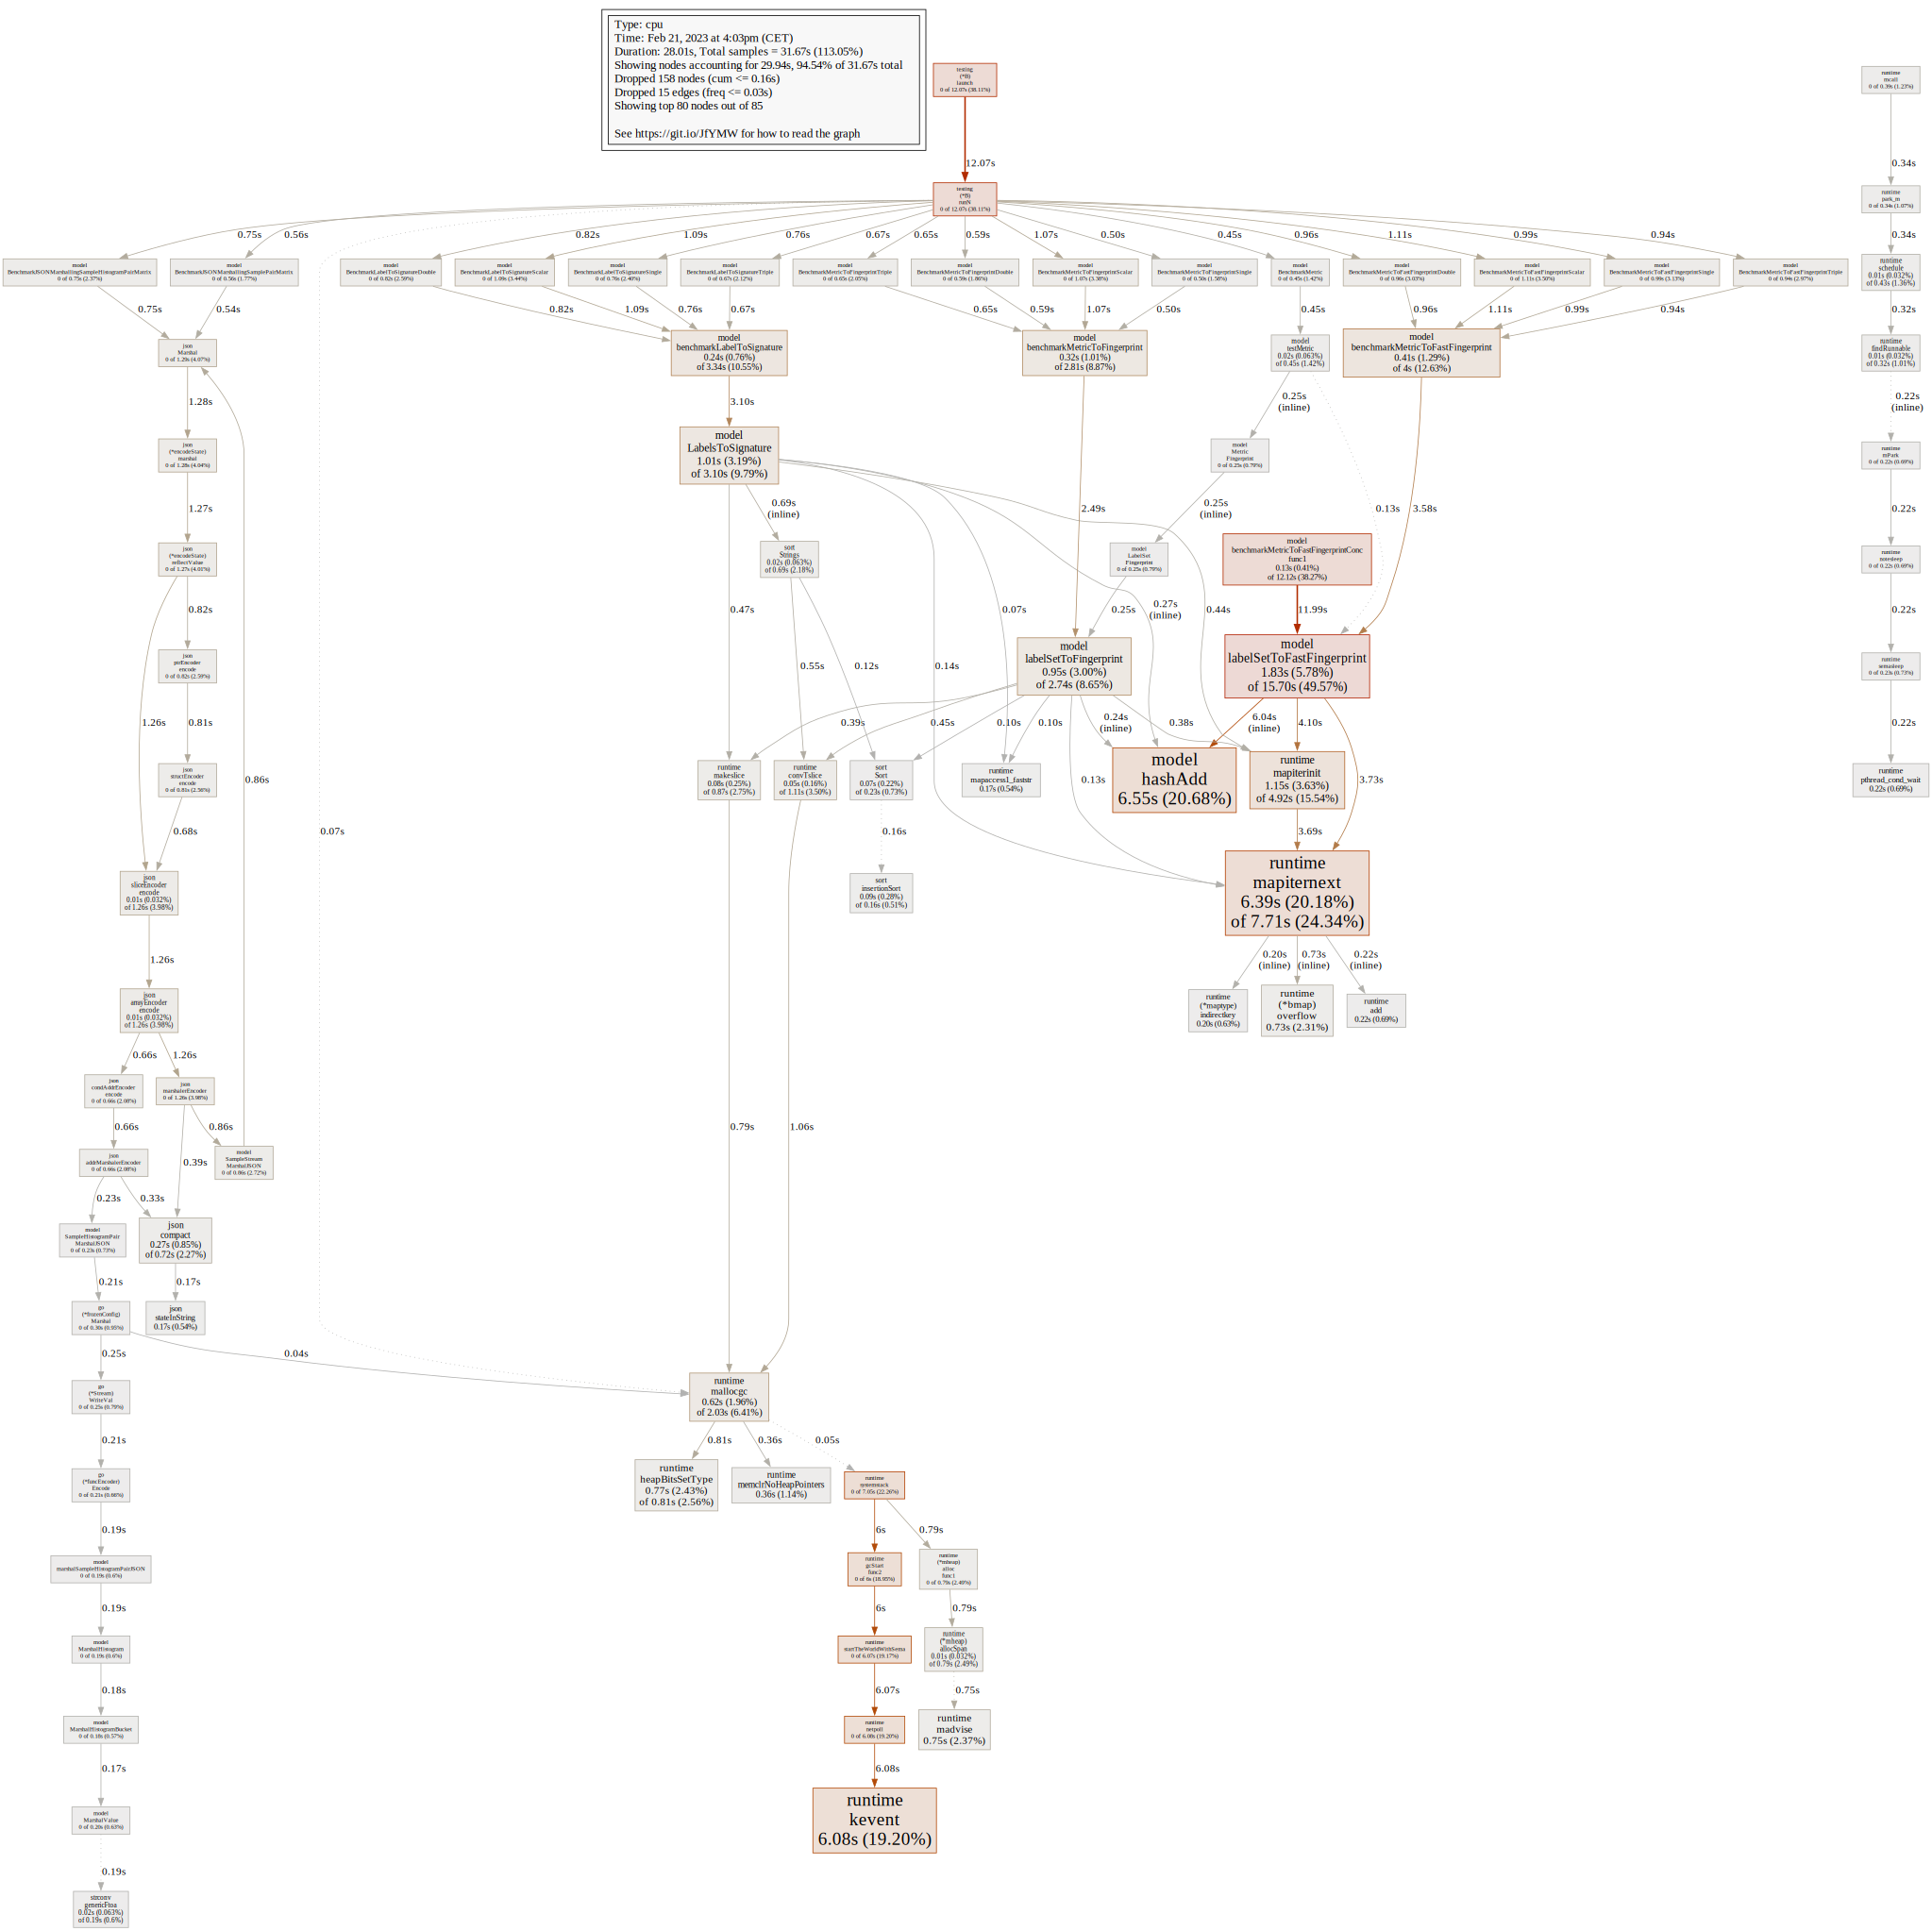

In [51]:
full_graph

In [4]:
from graphviz import Source, Digraph

s = Source.from_file(PATH)
g = Digraph()

source_lines = str(s).splitlines()
# Remove 'digraph tree {'
source_lines.pop(0)
# Remove the closing brackets '}'
source_lines.pop(-1)
# Append the nodes to body
g.body += source_lines


In [19]:
for node in g.body[5:70]:
    print(node)

N4 [label="model\nhashAdd\n6.55s (20.68%)" id="node4" fontsize=24 shape=box tooltip="github.com/prometheus/common/model.hashAdd (6.55s)" color="#b24300" fillcolor="#edded5"]
N5 [label="model\nbenchmarkMetricToFastFingerprintConc\nfunc1\n0.13s (0.41%)\nof 12.12s (38.27%)" id="node5" fontsize=11 shape=box tooltip="github.com/prometheus/common/model.benchmarkMetricToFastFingerprintConc.func1 (12.12s)" color="#b22c00" fillcolor="#eddbd5"]
N6 [label="runtime\nsystemstack\n0 of 7.05s (22.26%)" id="node6" fontsize=8 shape=box tooltip="runtime.systemstack (7.05s)" color="#b24000" fillcolor="#edded5"]
N7 [label="runtime\nkevent\n6.08s (19.20%)" id="node7" fontsize=24 shape=box tooltip="runtime.kevent (6.08s)" color="#b24a07" fillcolor="#eddfd6"]
N8 [label="testing\n(*B)\nlaunch\n0 of 12.07s (38.11%)" id="node8" fontsize=8 shape=box tooltip="testing.(*B).launch (12.07s)" color="#b22c00" fillcolor="#eddbd5"]
N9 [label="model\nbenchmarkMetricToFastFingerprint\n0.41s (1.29%)\nof 4s (12.63%)" id="no

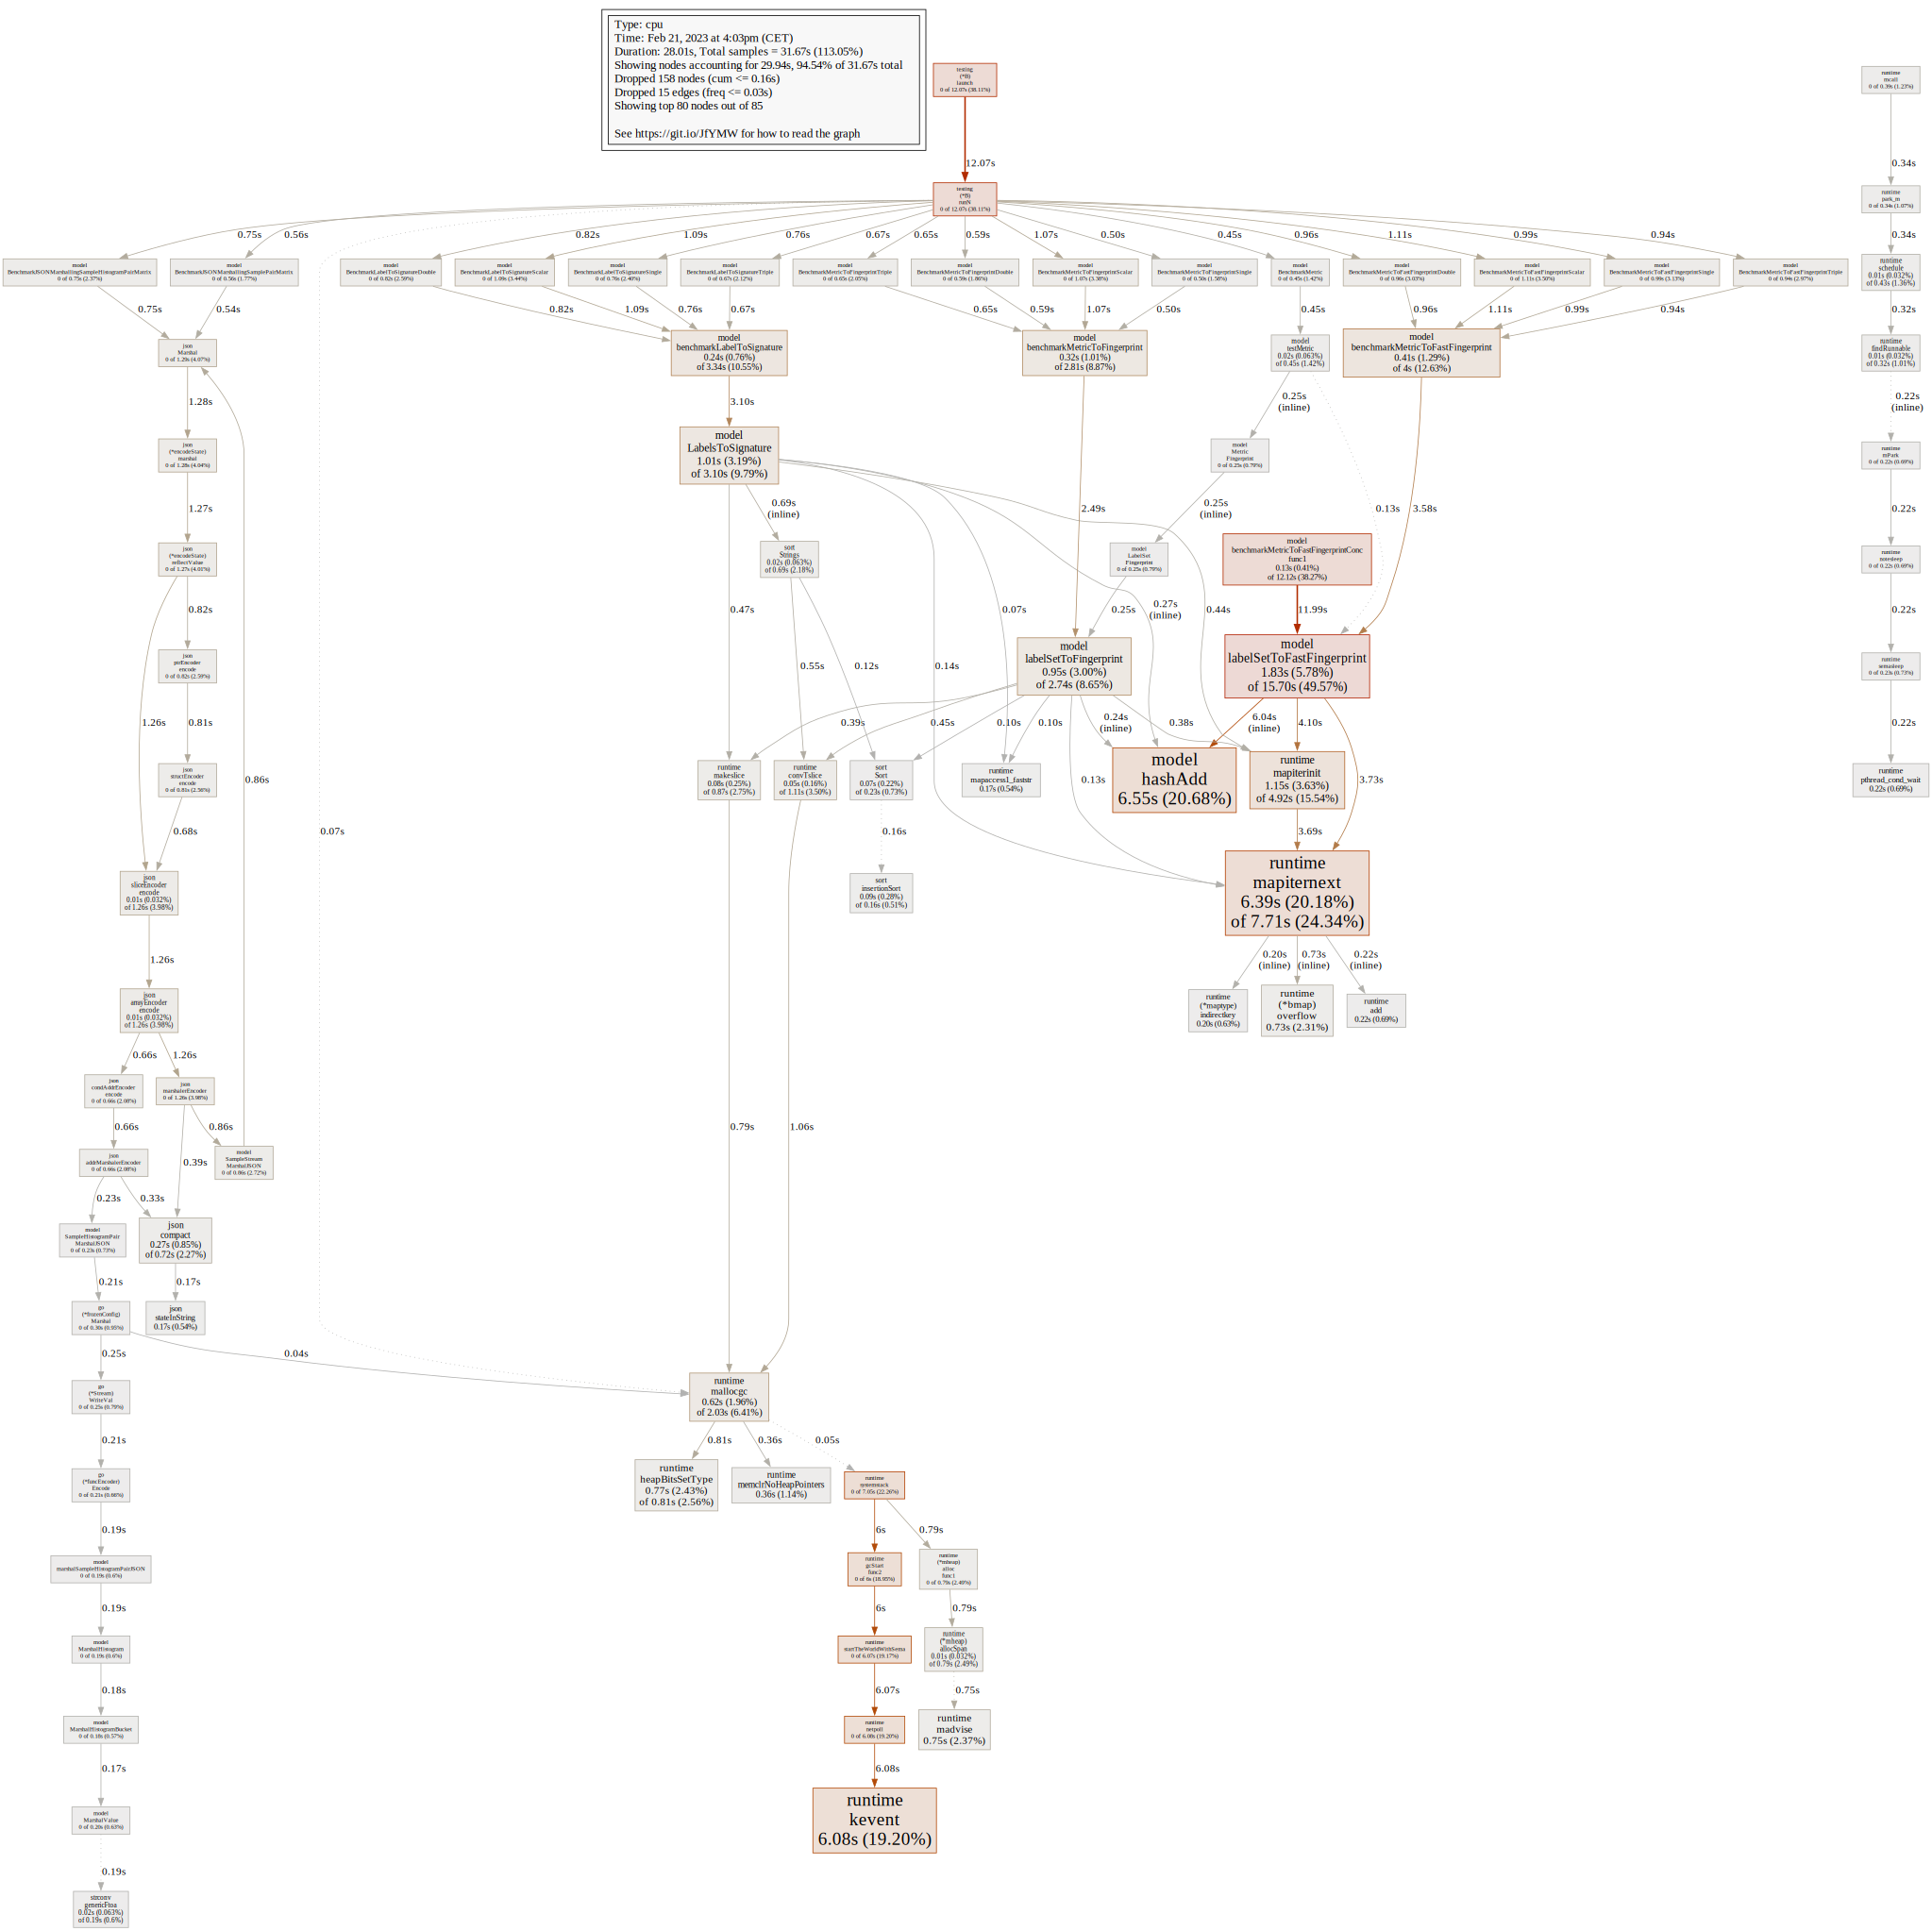

In [6]:
g